In [1]:
#install.packages("ISLR")
library(ISLR)
library(caret)

head(Hitters)
?Hitters

Hitters<-na.omit(Hitters)
length(Hitters$CHits)#tamaño muestral

set.seed(1234)#SOLO PARA NO CAMBIAR DE CODIGO EN CADA CLASE: la experiencia es reproducible
train.filas <- sample(nrow(Hitters),0.8*nrow(Hitters),replace=FALSE)
train.datos <- Hitters[train.filas,]
test.datos <- Hitters[-train.filas,]

train.datos.X<-model.matrix(CHits~., train.datos)[,-1]
test.datos.X <-model.matrix(CHits~., test.datos)[,-1]

lin<-lm(train.datos$Hits~.,data=train.datos)
summary(lin)

#install.packages("car")
library(car)
car::vif(lin)##calculo de los VIF para cada variable

Loading required package: ggplot2

Loading required package: lattice



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


[1] 263


Call:
lm(formula = train.datos$Hits ~ ., data = train.datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.7677  -5.4740  -0.1832   5.5039  20.6849 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.315273   2.658492  -0.871 0.384909    
AtBat        0.186888   0.012765  14.640  < 2e-16 ***
HmRun       -0.927695   0.173245  -5.355 2.46e-07 ***
Runs         0.750092   0.072275  10.378  < 2e-16 ***
RBI          0.295943   0.072903   4.059 7.18e-05 ***
Walks       -0.247672   0.050165  -4.937 1.73e-06 ***
Years        0.342026   0.367719   0.930 0.353484    
CAtBat      -0.020086   0.003698  -5.431 1.70e-07 ***
CHits        0.122493   0.017359   7.057 3.10e-11 ***
CHmRun       0.109853   0.047648   2.305 0.022219 *  
CRuns       -0.117169   0.020562  -5.698 4.55e-08 ***
CRBI        -0.040480   0.020649  -1.960 0.051417 .  
CWalks       0.035381   0.009117   3.881 0.000143 ***
LeagueN      2.027323   2.380381   0.852 0.395464    
DivisionW

Loading required package: carData



AtBat      HmRun       Runs        RBI      Walks      Years     CAtBat 
 10.415304   6.839687  10.103239  11.000119   3.901211   9.671901 223.868254 
     CHits     CHmRun      CRuns       CRBI     CWalks     League   Division 
402.673710  47.154971 147.393767 136.621281  18.610023   4.463257   1.163454 
   PutOuts    Assists     Errors     Salary  NewLeague 
  1.305795   2.961206   2.522789   2.200358   4.555346

Hitters                  package:ISLR                  R Documentation

_B_a_s_e_b_a_l_l _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Major League Baseball Data from the 1986 and 1987 seasons.

_U_s_a_g_e:

     Hitters
     
_F_o_r_m_a_t:

     A data frame with 322 observations of major league players on the
     following 20 variables.

     ‘AtBat’ Number of times at bat in 1986

     ‘Hits’ Number of hits in 1986

     ‘HmRun’ Number of home runs in 1986

     ‘Runs’ Number of runs in 1986

     ‘RBI’ Number of runs batted in in 1986

     ‘Walks’ Number of walks in 1986

     ‘Years’ Number of years in the major leagues

     ‘CAtBat’ Number of times at bat during his career

     ‘CHits’ Number of hits during his career

     ‘CHmRun’ Number of home runs during his career

     ‘CRuns’ Number of runs during his career

     ‘CRBI’ Number of runs batted in during his career

     ‘CWalks’ Number of walks during his career

     ‘League’ A factor with 

Loading required package: Matrix

Loaded glmnet 4.1-10



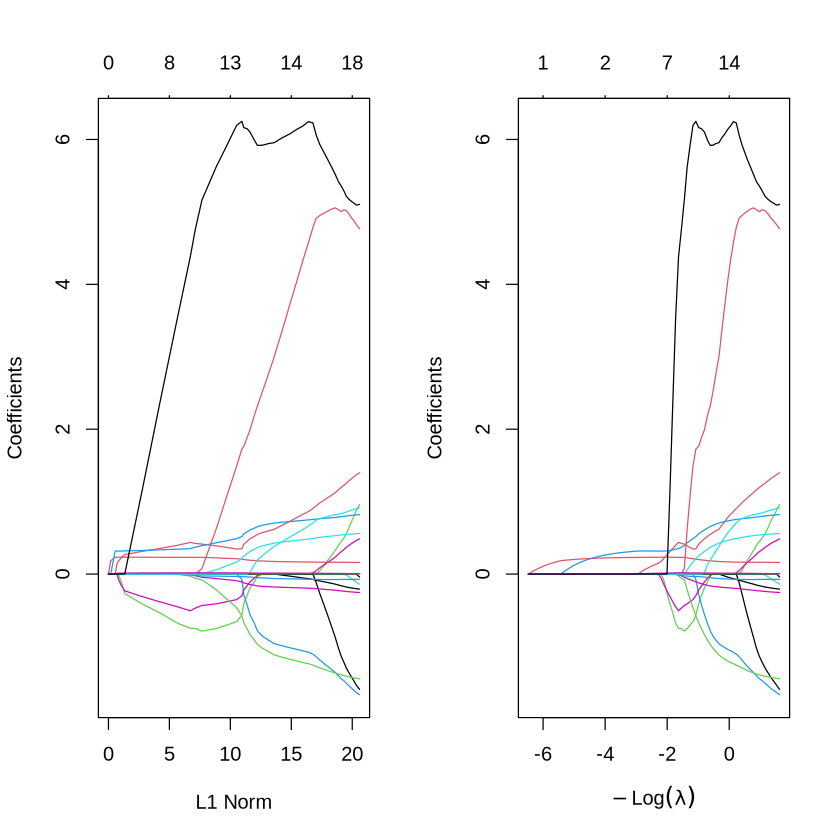

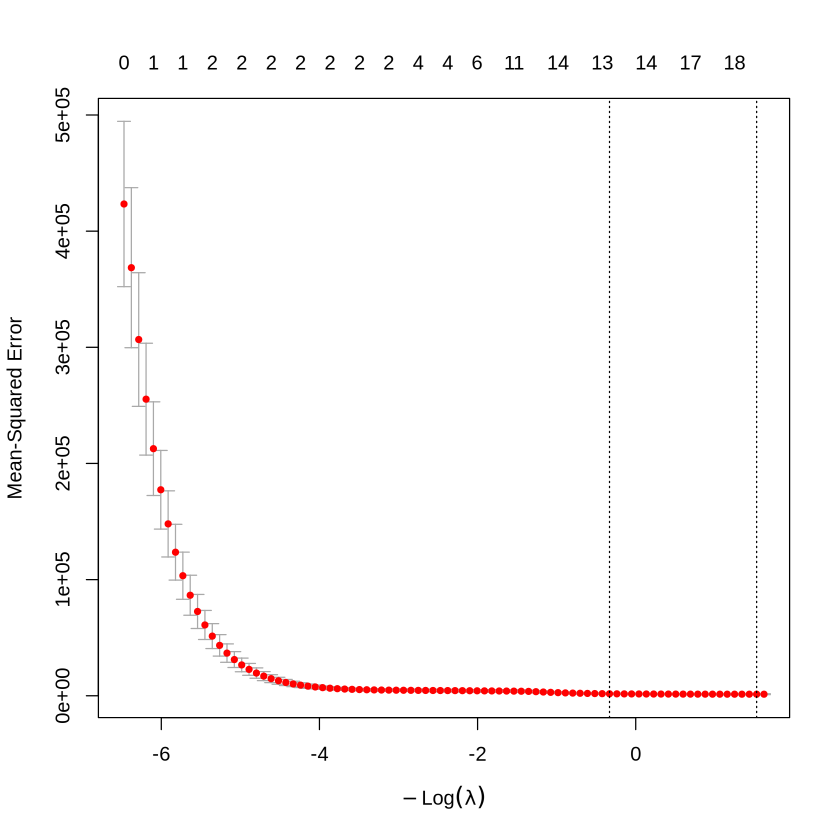

[1] 0

20 x 1 sparse Matrix of class "dgCMatrix"
               lambda.1se
(Intercept) -32.118348433
AtBat         .          
Hits          0.613917378
HmRun         .          
Runs         -0.953496382
RBI           .          
Walks         .          
Years         .          
CAtBat        0.174027516
CHmRun       -1.114924660
CRuns         0.702663741
CRBI          0.427545514
CWalks       -0.177990333
LeagueN       .          
DivisionW     2.986704189
PutOuts       0.002869781
Assists      -0.061285416
Errors        0.380775077
Salary        0.013415695
NewLeagueN    5.948594018

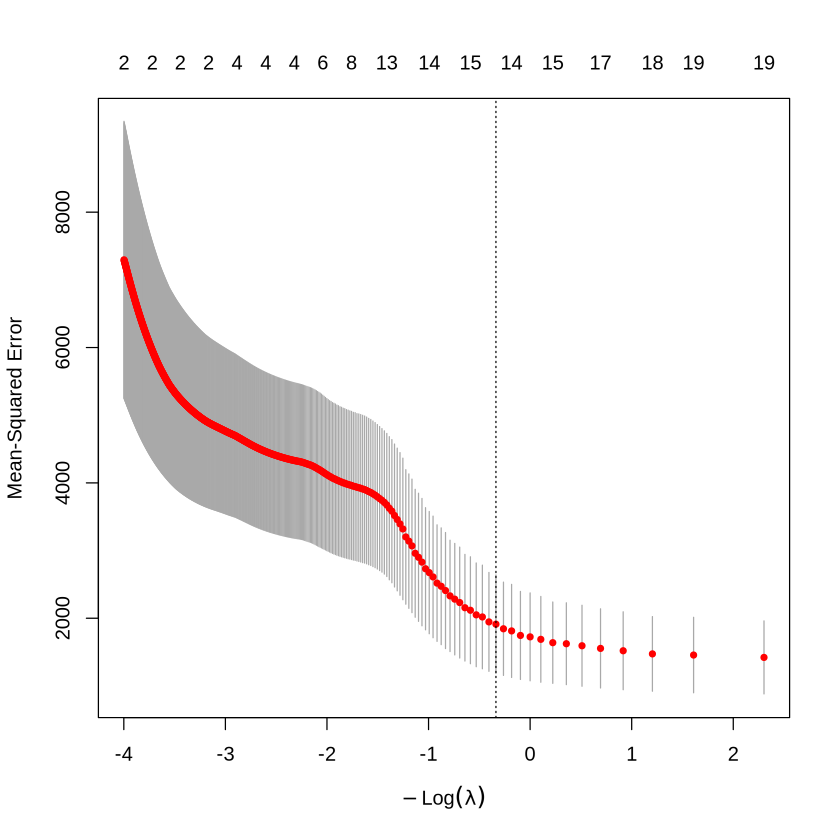

In [2]:
####################################
#Estimación con métodos penalizados#
####################################

library(glmnet)

################
#Modelado LASSO#
################

lasso.model <- cv.glmnet(train.datos.X, train.datos$CHits, alpha = 1, standardize = TRUE)

dg <- par(mfrow=c(1, 2))
plot(lasso.model$glmnet.fit, "norm",   label=TRUE)#norma L1 de los estimadores
#Cuando hay mucha penalización son cero, luego uno a uno son diferentes de cero
plot(lasso.model$glmnet.fit, "lambda", label=TRUE)#lambda
par(dg)

plot(lasso.model)

#Nos damos cuenta que la baja en varianza no ocurre. Mas o menos
#quedamos con el modelo sin penalizacion. Sin embargo podemos 
#ver que el MSE se queda bastante similar hasta log(lambda)=4
#Podemos enfocarnos en este intervalo

sec.lambda<-seq(0,exp(4),by=0.1)
lasso.model <- cv.glmnet(train.datos.X, train.datos$CHits, alpha = 1, standardize = TRUE,lambda=sec.lambda)
plot(lasso.model)

lasso.model$lambda.min#valor de lambda optimal
#coeficientes estimados
coef(lasso.model)

#Evaluacion
lasso.pred <- predict(lasso.model, newx = test.datos.X)
RMSE.lasso = RMSE(lasso.pred, test.datos$CHits)
Rsquare.lasso = R2(lasso.pred, test.datos$CHits)


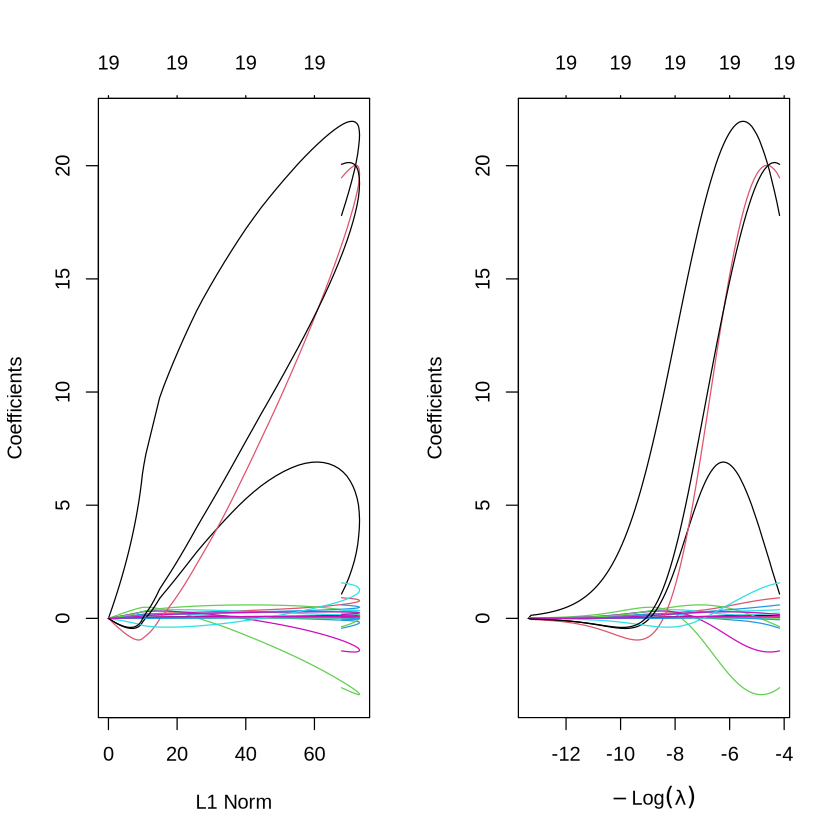

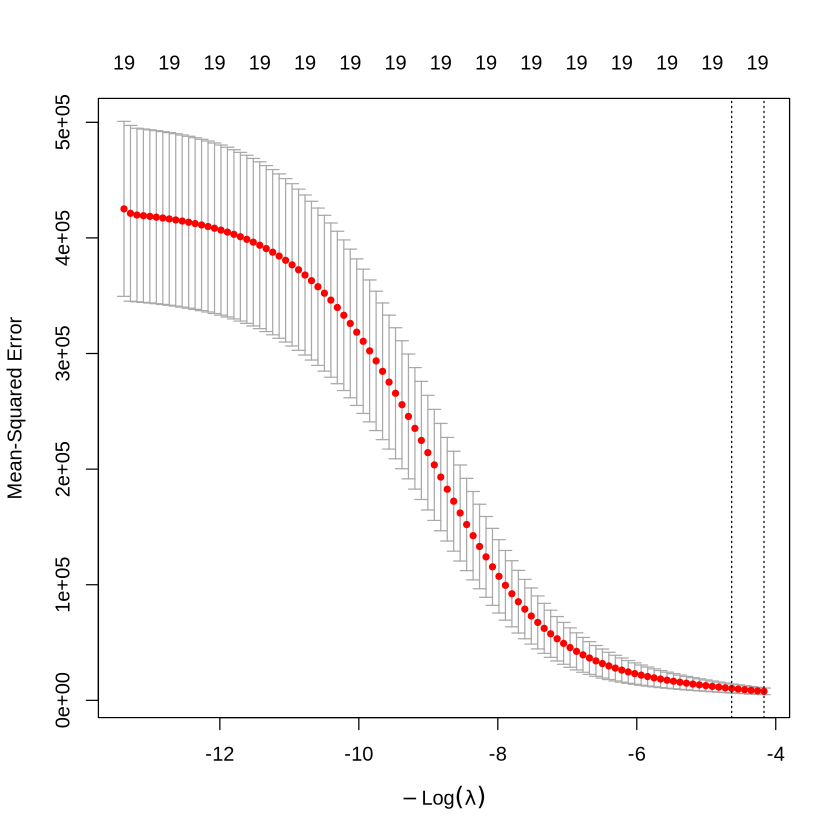

[1] 0

20 x 1 sparse Matrix of class "dgCMatrix"
               lambda.1se
(Intercept) -35.063936619
AtBat        -0.143627206
Hits          1.393348055
HmRun         0.530367874
Runs         -1.605508716
RBI          -0.154624280
Walks         0.101824095
Years         2.697350396
CAtBat        0.139389095
CHmRun       -1.344244656
CRuns         0.835897733
CRBI          0.550515736
CWalks       -0.179223398
LeagueN      -3.517464232
DivisionW     8.214527193
PutOuts       0.006347304
Assists      -0.078735476
Errors        1.234160769
Salary        0.012865491
NewLeagueN   11.964059508

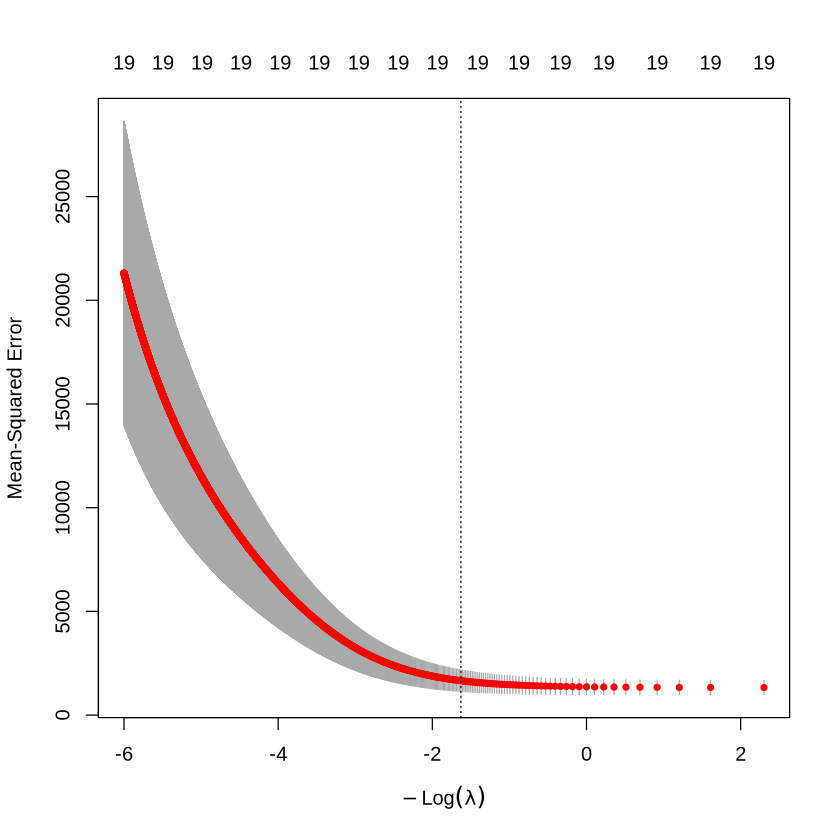

In [3]:
################
#Modelado RIDGE#
################

ridge.model <- cv.glmnet(train.datos.X, train.datos$CHits, alpha = 0, standardize = TRUE)

dg <- par(mfrow=c(1, 2))
plot(ridge.model$glmnet.fit, "norm",   label=TRUE)#norma L1 de los estimadores
#Cuando hay mucha penalización son cero, luego uno a uno son diferentes de cero
plot(ridge.model$glmnet.fit, "lambda", label=TRUE)#lambda
par(dg)

plot(ridge.model)

sec.lambda<-seq(0,exp(6),by=0.1)
ridge.model <- cv.glmnet(train.datos.X, train.datos$CHits, alpha = 0, standardize = TRUE,lambda=sec.lambda)
plot(ridge.model)

ridge.model$lambda.min#valor de lambda optimal
#coeficientes estimados
coef(ridge.model)

#Evaluacion
ridge.pred <- predict(ridge.model, newx = test.datos.X)
RMSE.ridge = RMSE(ridge.pred, test.datos$CHits)
Rsquare.ridge = R2(ridge.pred, test.datos$CHits)

,alpha,lambda
,<dbl>,<dbl>
2,0.1,0.6901124


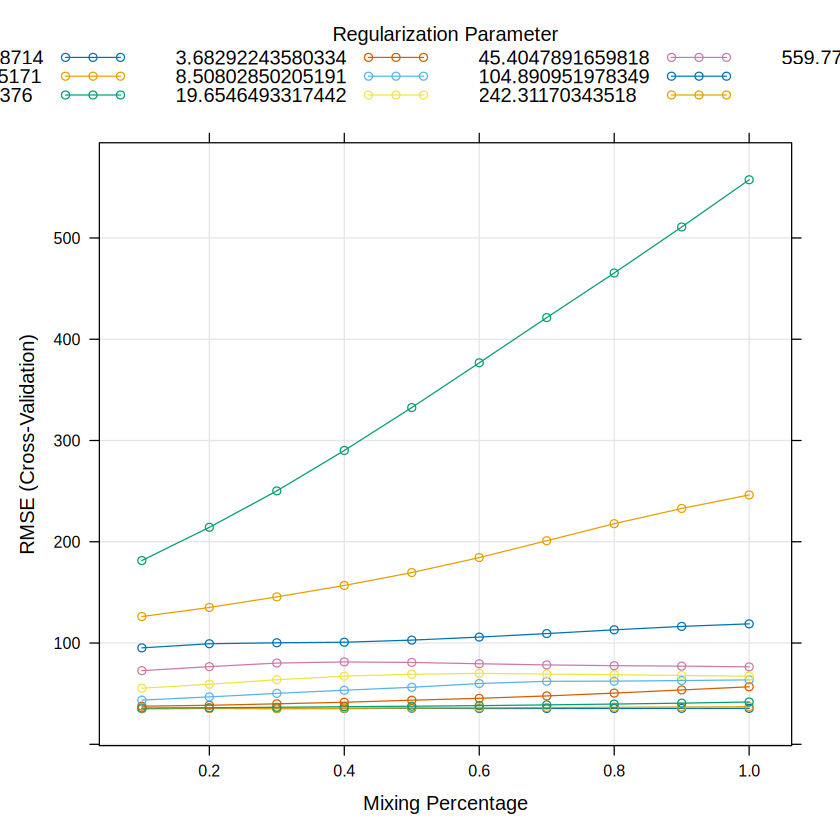

In [4]:
#############
#Elastic net#
#############

set.seed(123)
EN <- train(
  CHits ~., data = train.datos, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
)

plot(EN)
# Mejor modelo de acuerdo a los 2 parametros de penalizacion
EN$bestTune

EN.model<-cv.glmnet(train.datos.X, train.datos$CHits, alpha = 0.2, standardize = TRUE)

#Elastic Net
EN.pred <- predict(EN.model, newx = test.datos.X)
RMSE.EN = RMSE(EN.pred, test.datos$CHits)
Rsquare.EN = R2(EN.pred, test.datos$CHits)

In [5]:
###########################
#Evaluacion de los modelos#
###########################


#resumen
rmse <- cbind("RMSE" = c(RMSE.lasso, RMSE.ridge, RMSE.EN))
rownames(rmse) <- c("Lasso", "Ridge", "EN")
print(rmse)

rc <- cbind("R-cuadrado" = c(Rsquare.lasso, Rsquare.ridge, Rsquare.EN))
rownames(rc) <- c("Lasso", "Ridge", "EN")
print(rc)

          RMSE
Lasso 35.52225
Ridge 33.57232
EN    33.26454
      R-cuadrado
Lasso  0.9974863
Ridge  0.9976454
EN     0.9977393
